<h1 align="center"> Trabajo práctico 4 - Gestión y visualización de datos con Pandas y MatplotLib </h1>

<i>¿Cuál versión de Python estoy utilizando?</i>

In [55]:
!python -V

Python 3.6.1 :: Anaconda custom (64-bit)


<div style="border: 2px solid #D24747; background-color:#F8B4B4">
<h2>Objetivos de la actividad</h2>
<ul>
<li>Utilizar las librerias Pandas y MatplotLib para manipular y visualizar conjuntos de datos</li>
<li>Introducir algunos conceptos de Ciencia de los Datos...
</ul>

El Trabajo Práctico siguiente es inspirado del <a href="https://github.com/jvns/pandas-cookbook">Pandas Cookbook</a> desarrollado por Julia Evans (2015).

<h2>0. Unas palabras sobre las herramientas de Python para la Ciencia de los Datos...</h2>

<img src="python-packages.png"></img>

<p>Cada toolkit de Python tiene sus propios objetivos:</p>
<ul>
     <li><b>Numpy</b> agrega funcionalidades en Python para soportar arreglos y matrices de gran tamaño y funciones matemáticas para manipularlas.</li>
     <li><b>SciPy</b> es una colección de algoritmos matemáticos y funciones programadas con NumPy. Agrega funciones y clases de alto nivel para facilitar la manipulación y visualización de datos.</li>
      <li><b>Pandas</b> ofrece estructuras de datos y operaciones para manipular y analizar matrices de datos numéricos y series de tiempo.</li>
    <li><b>Scikit-learn</b> es una librería Python para el Machine Learning, contiene una implementación de los principales algoritmos estandares para el aprendizaje supervisado y no supervisado.</li>
</ul>

<h2>1. Conceptos básicos: leer un DataFrame y visualizar</h2>

In [56]:
# Cargar las librerías
import pandas as pd
import matplotlib.pyplot as plt

<p>El primer dataset que queremos explorar consiste en un archivo CSV donde se encuentra información sobre cómo la gente utiliza las pistas para bicicletas de la ciudad de Montreal.</p>
<ul><li>La primera etapa consiste en cargar los datos en un objeto <i>DataFrame</i>. Un DataFrame es una de las estructuras de datos provistas por Pandas para representar los datos, consiste en una matriz en dos dimensiones (ver <a href="https://pandas.pydata.org/pandas-docs/stable/dsintro.html">más detalles</a>) donde cada fila es un dato y cada columna una característica sobre los datos.</li></ul>

In [57]:
#Cargar los datos en un DataFrame "df"
df = pd.read_csv('bike2016.csv', sep=",")
#Ver solamente las 3 primeras filas
df[:3]

,Date,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
0,01/01/2016,00:00,32,0,27,0.0,51.0,16,1,5,1,13,NaN,93,12,6,38,68,14,11
1,02/01/2016,00:00,68,0,6,0.0,93.0,25,2,16,6,9,NaN,141,16,11,67,106,30,14
2,03/01/2016,00:00,78,3,4,0.0,118.0,38,0,6,1,6,NaN,116,25,10,21,59,25,5


<b>Pregunta: A qué corresponden los atributos y los valores?</b>

Los atributos: Corresponden a lugares (calles) por donde se transita en bicicleta y además, de la fecha y hora donde paso la bicicleta. 
Los valores: La fecha en la que se tomaron los datos, hora por defecto, cantidad de bicicletas que pasan en los diferentes lugares nombrados. 

In [58]:
df = pd.read_csv('bike2016.csv', sep=",",parse_dates=['Date'],dayfirst=True, index_col="Date", encoding="latin1")
df[:3]

,Unnamed: 1,Berri1,Boyer,BrÃ©beuf,CSC (CÃ´te Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Pont_Jacques_Cartier,Rachel / HÃ´tel de Ville,Rachel / Papineau,RenÃ©-LÃ©vesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,,,,
2016-01-01,00:00,32,0,27,0.0,51.0,16,1,5,1,13,NaN,93,12,6,38,68,14,11
2016-01-02,00:00,68,0,6,0.0,93.0,25,2,16,6,9,NaN,141,16,11,67,106,30,14
2016-01-03,00:00,78,3,4,0.0,118.0,38,0,6,1,6,NaN,116,25,10,21,59,25,5


<b>Pregunta: 
<ul>
<li>¿De qué sirven los atributos "sep", "parse_dates", "dayfirst" y "index_col"?</li>
<li>Modifique el valor del parametro 'encoding' para evitar problemas con los caracteres</li></b>

sep = es el delimitador establecido para separar cada uno de los valores. 
parse_dates = parsea las columna como fecha.
dayfirst = deja los formatos internacionales y europero de Fechas en el formato DD / MM.
index_col = columna en la cual se estable la etiqueta.

<ul>
<li>Seleccionar una columna particular:</li>
</ul>

In [59]:
df_Berri1 = df['Berri1']
df_Berri1[:4]

Date
2016-01-01     32
2016-01-02     68
2016-01-03     78
2016-01-04    118
Name: Berri1, dtype: int64

<ul>
<li>Dibujar un gráfico simple con los valores de una columna:</li>
</ul>

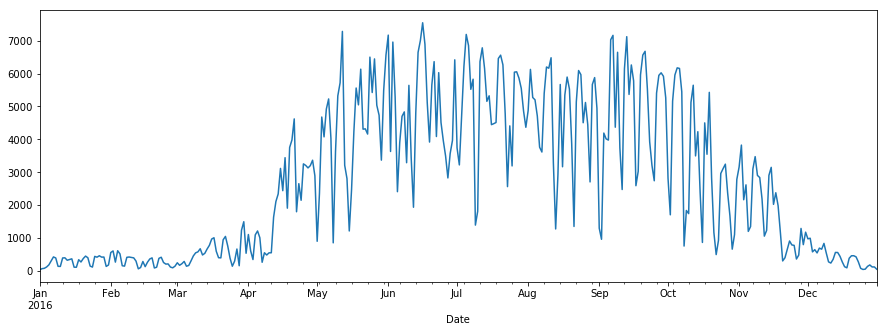

In [60]:
df['Berri1'].plot()
plt.show()

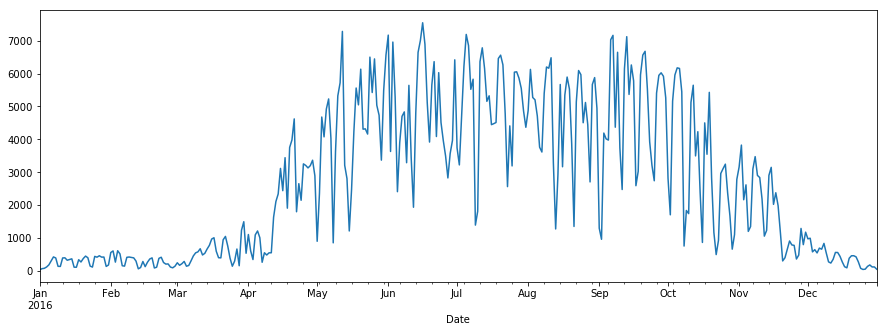

In [61]:
#Modificar el tamaño de la figura
plt.rcParams['figure.figsize'] = (15, 5)

df['Berri1'].plot()
plt.show()

<ul>
<li>Crear un gráfico para visualizar los datos de todos los lugares</li>
</ul>

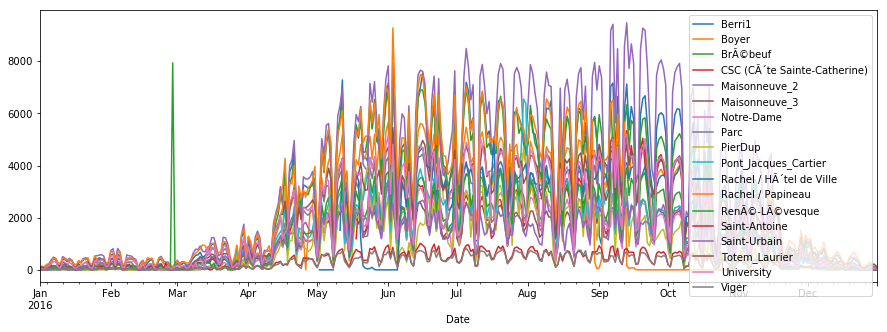

In [62]:
df.plot()
plt.show()

<b>Pregunta: ¿En SQL, cuáles serían las consultas equivalentes a las celdas siguientes?</b>

In [63]:
df[:5]

,Unnamed: 1,Berri1,Boyer,BrÃ©beuf,CSC (CÃ´te Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Pont_Jacques_Cartier,Rachel / HÃ´tel de Ville,Rachel / Papineau,RenÃ©-LÃ©vesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,,,,
2016-01-01,00:00,32,0,27,0.0,51.0,16,1,5,1,13,NaN,93,12,6,38,68,14,11
2016-01-02,00:00,68,0,6,0.0,93.0,25,2,16,6,9,NaN,141,16,11,67,106,30,14
2016-01-03,00:00,78,3,4,0.0,118.0,38,0,6,1,6,NaN,116,25,10,21,59,25,5
2016-01-04,00:00,118,6,60,2.0,165.0,80,0,46,0,3,NaN,202,49,9,4,99,111,29
2016-01-05,00:00,183,2,25,2.0,239.0,86,2,110,5,3,NaN,241,77,12,11,106,158,44


SELECT * FROM df LIMIT 5

In [64]:
df[:3]['Boyer'] 

Date
2016-01-01    0
2016-01-02    0
2016-01-03    3
Name: Boyer, dtype: int64

SELECT Boyer,date FROM df LIMIT 3

In [65]:
df[['Boyer','Maisonneuve_2']][:4]

,Boyer,Maisonneuve_2
Date,,
2016-01-01,0,51.0
2016-01-02,0,93.0
2016-01-03,3,118.0
2016-01-04,6,165.0


SELECT Date, Boyer, Maisonneuve_2 FROM df LIMIT 4

<h2>2. Una operación muy útil en Data Science: "Group By" y "Aggregate"</h2>

<ul>
<li>En el ejercicio siguiente, vamos a responder a la pregunta siguiente: ¿Qué día los habitantes de Montreal pasan lo más por la calle 'Berri'?
</ul>

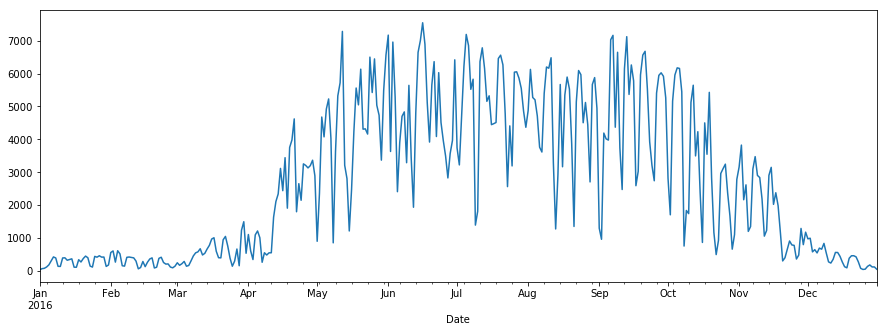

In [66]:
df['Berri1'].plot()
plt.show()

Es díficil responder a la pregunta con este gráfico... Sería ideal poder hacer un 'group by' según el día de la semana. 

In [67]:
#Creación de un dataframe con los datos de la calle 'Berri'
df_berri = df[['Berri1']].copy()
df_berri[:5]

,Berri1
Date,
2016-01-01,32
2016-01-02,68
2016-01-03,78
2016-01-04,118
2016-01-05,183


<ul><li>df_berri es una variable de tipo DataFrame, tiene una columna particular que sirve como Index. ¿Cuál es el index de df_berri? ¿Cuál es el tipo de datos: String o Date?</li></ul>

El index es Date, tipo de datos de Berri1 string 

In [68]:
df_berri.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

<b>Pregunta: ¿Qué datos devuelven las variables 'day' y 'weekday' del DatetimeIndex?</b>

Day el numero del dia del mes

Weekday el numero del dia de la semana
El día de la semana con lunes = 0, domingo = 6.

In [69]:
df_berri.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=366)

In [70]:
df_berri.index.weekday

Int64Index([4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
            ...
            3, 4, 5, 6, 0, 1, 2, 3, 4, 5],
           dtype='int64', name='Date', length=366)

<ul><li>0 corresponde a 'Lunes', 1 a 'Martes', etc. Ahora podemos agregar esta información en nuestra DataFrame:</li></ul>

In [71]:
df_berri.loc[:,'weekday'] = df_berri.index.weekday
df_berri[:5]

,Berri1,weekday
Date,,
2016-01-01,32,4
2016-01-02,68,5
2016-01-03,78,6
2016-01-04,118,0
2016-01-05,183,1


<b>Pregunta: ¿De qué sirve la función <i>loc()</i>?

La función loc(): accede al grupo de filas o columnas por etiquetas o un arreglo de booleanos

<ul>
<li>En Pandas, las DataFrame tienen una función <i>groupby()</i> similar a SQL. Calculemos la suma de bicicletas que pasaron por la calle Berri1 agrupadas según el día de la semana:</li></ul>

In [72]:
weekday_counts = df_berri.groupby('weekday').aggregate(sum)
weekday_counts

,Berri1
weekday,
0,141936
1,176377
2,176379
3,161043
4,146989
5,100654
6,85217


<ul><li>Sería mejor reemplazar los valors '0', '1', '2', etc. por el nombre del día. Reemplazemos los valores de la columna index:</li></ul>

In [73]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri1
Monday,141936
Tuesday,176377
Wednesday,176379
Thursday,161043
Friday,146989
Saturday,100654
Sunday,85217


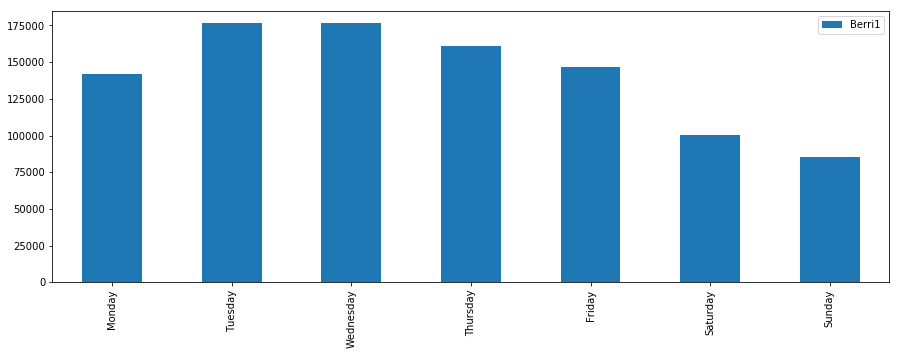

In [74]:
#Visualizar en un histograma
weekday_counts.plot(kind='bar')
plt.show()

<b>Pregunta: ¿Cuál es la respuesta a nuestra pregunta inicial?</b>

El día miércoles.

<h2>3. Gestionar los datos de tipo String y Serie de Tiempo desde Pandas</h2>

Vimos anteriormente que Pandas ofrece funcionalidades interesantes para manipular fechas, es also interesante para manipular cadenas de caracteres.

<ul>
<li>En esta sección, jugaremos con el dataset 'weather_2012.csv' que contiene datos meteorologicos de Montreal, y trataremos responder a la pregunta científica siguiente: <i>¿Qué mes hay más nieve en Montreal?</i></li>
</ul>

In [75]:
weather_2012 = pd.read_csv('weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


La columna "Weather" da precisiones sobre las condiciones climáticas en Montreal con algunas palabras claves. Cuando hay nieve, este campo contiene la palabra 'Snow'. Pandas tiene funcionalidades para manipular columnas contieniendo texto (ver <a href="http://pandas.pydata.org/pandas-docs/stable/basics.html#vectorized-string-methods">Documentación</a>), por ejemplo:

In [76]:
weather_column=weather_2012['Weather']
is_snowing = weather_column.str.contains('Snow')
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

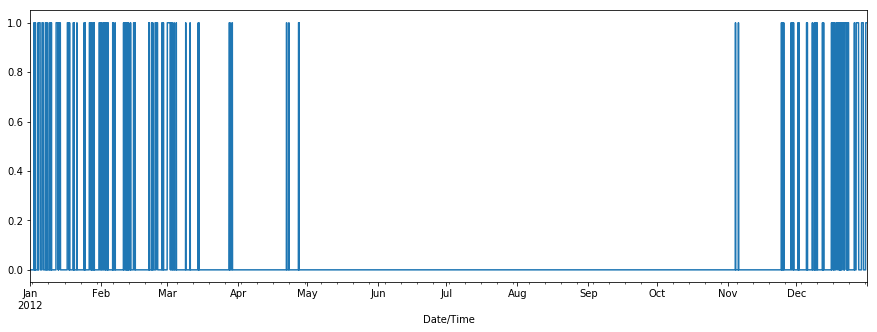

In [77]:
is_snowing.plot()
plt.show()

<ul>
<li>Pandas tiene una función <i>resample()</i> muy práctica que permite discretizar series de tiempo según varias granularidad. Ver <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html">documentación</a> y <a href="http://benalexkeen.com/resampling-time-series-data-with-pandas/">ejemplos</a>.Esta función es un poco similar a un Group By pero con datos temporales.</li>
<li>En nuestro ejemplo, vamos a organizar los datos de temperatura por mes ('M') tomando la mediana cómo función de agregación.</li>
</ul>

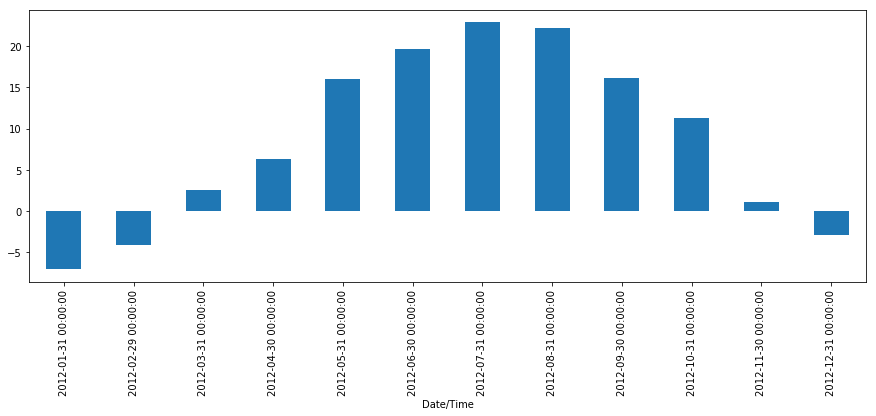

In [78]:
import numpy as np

weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind='bar')
plt.show()

<ul>
<li>Para responder a nuestra pregunta de investigación inicial, podemos hacer el mismo "resample" con los datos que indican si hay nieve o no. Pero necesitamos convertir el tipo de datos antes:</li>
</ul>

In [79]:
#Convertir los valores de la DataFrame is_snowing (booleano --> float)
is_snowing.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
2012-01-01 05:00:00    0.0
2012-01-01 06:00:00    0.0
2012-01-01 07:00:00    0.0
2012-01-01 08:00:00    0.0
2012-01-01 09:00:00    0.0
Name: Weather, dtype: float64

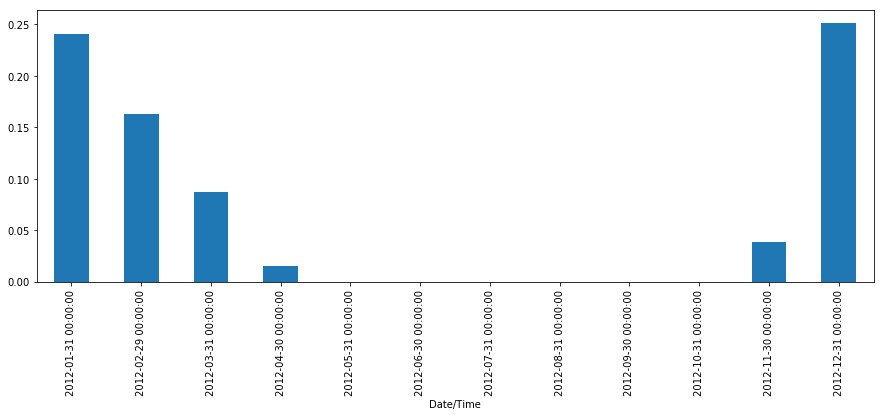

In [80]:
is_snowing.astype(float).resample('M').apply(np.mean).plot(kind='bar')
plt.show()

<b>Pregunta: ¿Cuál es la respuesta a nuestra pregunta de investigación?</b>

En el mes de diciembre hay más nieve en Montreal

<ul>
<li>Finalmente, podemos crear un nuevo dataset con los datos "Temperature" y "Snow" que hemos reorganizados, y visualizarlos en un mismo gráfico.
</ul>

In [81]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

<ul><li>Utilizamos la función <i>concat()</i> para agrupar las dos dataframes anteriores, precisando el nombre de cada columna:</li></ul>

In [82]:
new_df_stats = pd.concat([temperature, snowiness], axis=1)
new_df_stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


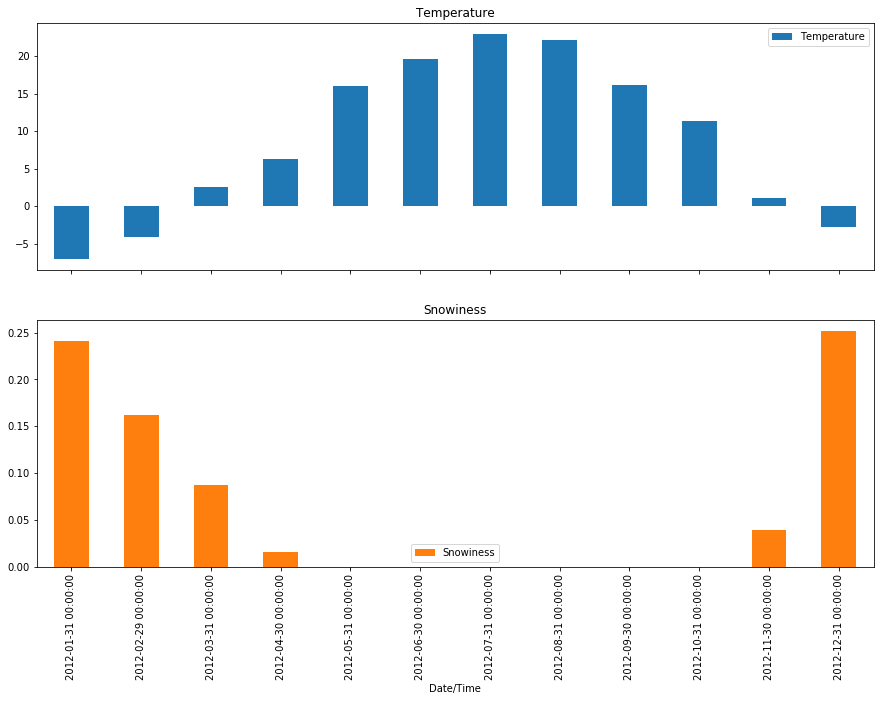

In [83]:
new_df_stats.plot(kind='bar', subplots=True, figsize=(15, 10))
plt.show()


<h2>4. Data Science: Caso de estudio</h2>

<p>El dataset '311-service-requests' contiene datos correspondiendo a llamadas al servicio 311 de la ciudad de Nueva York. 311 es servicio para procesar situaciones no urgentes, por ejemplo: vehiculo abandonado, denuncias por ruido, semaforos que no funcionan, etc.).</p> 

In [89]:
df_nyc_311 = pd.read_csv('311-service-requests.csv', low_memory=False)
df_nyc_311[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [85]:
df_nyc_311['Borough'].value_counts()

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: Borough, dtype: int64

<b>Preguntas de investigación:</b>
<ul>
<li>¿Cuáles son los tipos de denuncias (Complaint Type) más frecuentes en Nueva York y por barrios ('Borough')?</li>
<li>¿Qué barrio tiene más denuncias por ruido ('Noise')?</li>
</ul>

In [95]:
df_nyc_311['Complaint Type'].value_counts()


HEATING                                 14200
GENERAL CONSTRUCTION                     7471
Street Light Condition                   7117
DOF Literature Request                   5797
PLUMBING                                 5373
PAINT - PLASTER                          5149
Blocked Driveway                         4590
NONCONST                                 3998
Street Condition                         3473
Illegal Parking                          3343
Noise                                    3321
Traffic Signal Condition                 3145
Dirty Conditions                         2653
Water System                             2636
Noise - Commercial                       2578
ELECTRIC                                 2350
Broken Muni Meter                        2070
Noise - Street/Sidewalk                  1928
Sanitation Condition                     1824
Rodent                                   1632
Sewer                                    1627
Taxi Complaint                    

Los tipos de denuncias (Complaint Type) más frecuentes en Nueva York: 
Heating:14200 y General Construction: 7471.
y por barrios(Borough):
Brooklyn 32090 y Manhattan 24288.


In [161]:
complainb=df_nyc_311[['Complaint Type','Borough']] #dataframe con las molestias y vecindarios
cb=complainb['Complaint Type'].str.contains('Noise') # operación que pregunta si el string de cada valor tiene un “noise”
b=complainb['Borough'] #dataframe con los nombres de todos los borough
complainborough=pd.concat([cb, b], axis=1) #concatenar los complaint que tienen noise con los nombres de borough
complainborough.groupby('Borough').aggregate(sum)#agrupar y agregar datos


,Complaint Type
Borough,
BRONX,719.0
BROOKLYN,2344.0
MANHATTAN,4337.0
QUEENS,1277.0
STATEN ISLAND,258.0
Unspecified,7.0


Manhattan tiene mas denuncias por ruido 4337